<br>
<u>Notebook Six</u> | 
<a href=https://github.com/andrealeone/NLP target=_blank>Repository</a>
<br><br>
<b>Nearest Neighbors and Outliers Detection</b><br><br>
Andrea Leone<br>
University of Trento<br>
January 2022
<br><br>

In [1]:
import project 

import sklearn
import sklearn.neighbors
import sklearn.ensemble

project.notebook()

In [2]:
records = project.sql_query(""" 
    SELECT vector, category FROM talks
    WHERE  vector IS NOT NULL
    ORDER BY slug ASC;
""")

(x, y), (z, t)                       \
    = train_set, test_set            \
    = splits                         \
    = project.split_in_sets( records )

project.describe_sets(splits)

train_set  =>  (0, 1376) (1, 1572) (2, 1052) 
test_set   =>  (0,  243) (1,  275) (2,  192) 


<br/>

### NearestCentroid Classifier

<br>
A nearest centroid classifier is a classification model that assigns to observations the label of the class of training samples whose mean (centroid) is closest to the observation. Euclidean distance is the default metric used to compute the interspace between instances.<br/>
<br>

In [3]:
nc  = sklearn.neighbors.NearestCentroid().fit(x,y)

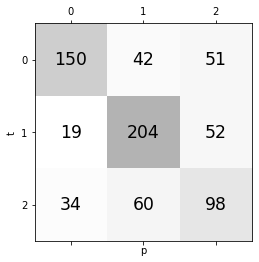

accuracy    0.6366197183098592
precision   0.6310483706263429
recall      0.6231729330340441


In [4]:
p   = nc.predict(z)

confusion_matrix          = project.confusion_matrix (t,p)
accuracy,precision,recall = project.present_metrics  (t,p)

<b>score board</b> — NearestCentroid<br>
<pre>
pipeline         accuracy  precision recall     cm_d

en_core_web_lg   .63661971 .63104837 .62317293  150 204  98
en_core_web_lg   .64603174 .63519903 .63491569  152 167  88  without outliers (pm=LOF)
en_core_web_lg   .67982456 .66279152 .65754219  105 148  57  without outliers (pm=IF)

en_core_web_trf  .41043723 .41442327 .40269239  135  90  66
en_core_web_trf  .40771812 .40518234 .40022292   88 106  49  without outliers (pm=LOF)
en_core_web_trf  .43167701 .42130935 .42467788   54  58  27  without outliers (pm=IF)

</pre>

<br/>

### K-Neighbors Classifier

<br>
The KNN classifier is a non-parametric method that outputs the probability that the input point belongs to a class. The classification is the result of a plurality vote of its k neighbors. Weights and algorithm can be tuned.<br/>
<br>

In [5]:
knc = sklearn.neighbors.KNeighborsClassifier(
    n_neighbors=7, weights='distance',
    algorithm='ball_tree', leaf_size=50
).fit(x,y)

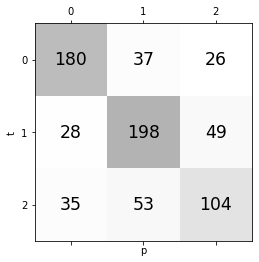

accuracy    0.6788732394366197
precision   0.6697487757776398
recall      0.667469135802469


In [6]:
p   = knc.predict(z)

confusion_matrix          = project.confusion_matrix (t,p)
accuracy,precision,recall = project.present_metrics  (t,p)

<b>score board</b> — KNeighborsClassifier<br>
<pre>
pipeline         accuracy  precision recall      cm_d

en_core_web_lg   .67887323 .66974877 .66746913   180 198 104
en_core_web_lg   .71587301 .70719417 .70272845   181 174  96  without outliers (pm=LOF)
en_core_web_lg   .72807017 .70811300 .70502846   118 154  60  without outliers (pm=IF)

en_core_web_trf  .53878702 .51926733 .51939140   153 173  56
en_core_web_trf  .50167785 .47172080 .47153926   101 157  41  without outliers (pm=LOF)
en_core_web_trf  .51863354 .49376640 .49577381    65  77  25  without outliers (pm=IF)

</pre>

<br/>

### Local Outlier Factor Classifier

<br>
The LOF algorithm is used as an unsupervised outlier detector.  
The anomaly score of each sample is called Local Outlier Factor: it measures the local deviation of density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. More precisely, locality is given by k-nearest neighbors, whose distance is used to estimate the local density. By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors. These are considered outliers.<br/>
<br>

In [7]:
outliers = sklearn.neighbors.LocalOutlierFactor().fit_predict([x for x,y in records])

In [8]:
records2 = project.remove_outliers (records,  outliers)
splits2  = project.split_in_sets   (records2, splitting_value=3900)

project.describe_sets(splits2)

Data reduced from 4710 to 4630 (-1.70%).

train_set  =>  (0, 1332) (1, 1541) (2, 1027) 
test_set   =>  (0,  268) (1,  272) (2,  190) 


<br/>

### Isolation Forest Classifier

<br>
The IsolationForest algorithm returns the anomaly score for each sample.  
It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node. This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.  
  
Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.<br/>
<br>

In [9]:
outliers = sklearn.ensemble.IsolationForest(random_state=42).fit_predict([x for x,y in records])

In [10]:
records3 = project.remove_outliers (records,  outliers)
splits3  = project.split_in_sets   (records3, splitting_value=3900)

project.describe_sets(splits3)

Data reduced from 4710 to 4456 (-5.39%).

train_set  =>  (0, 1358) (1, 1519) (2, 1023) 
test_set   =>  (0,  181) (1,  230) (2,  145) 


<br>